### Euclidian Distance / 2D

The algorithm works by `finding` the k nearest neighbors to the input data point.   
The predicted label is assign based on the `majority` vote of the k-nearest neighbors.  
The nearest neighbor is found using `euclidean` distance between two points.  


$ d(x,y) = \sqrt{(x2 - x1)^2 + (y2 - y1)^2} $  

ic| D: [1.61245154965971,
        1.746424919657298,
        1.3038404810405297,
        1.118033988749895,
        1.4230249470757708,
        1.3416407864998738,
        1.8027756377319946,
        1.70293863659264,
        1.2041594578792296,
        1.4916433890176297,
        2.23606797749979,
        2.7294688127912363,
        2.8460498941515415,
        2.3769728648009427,
        2.534758371127315]
ic| D_nearest: [1.118033988749895, 1.2041594578792296, 1.3038404810405297]
ic| knn_keys: [2, 3, 8]
ic| knn_targets: [1, 1, 2]


Class prediction for [3.6, 1.8] = 1


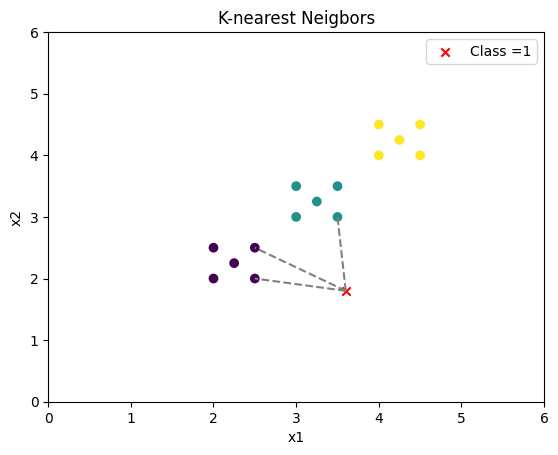

In [2]:
import matplotlib.pyplot as plt
from icecream import ic
import math

# Train dataset (features and labels)
X = [
    [2, 2], [2, 2.5], [2.5, 2.5], [2.5, 2], [2.25, 2.25],
    [3, 3], [3, 3.5], [3.5, 3.5], [3.5, 3], [3.25, 3.25],
    [4, 4], [4, 4.5], [4.5, 4.5], [4.5, 4], [4.25, 4.25],
]
y = [
    1, 1, 1, 1, 1,
    2, 2, 2, 2, 2,
    3, 3, 3, 3, 3,
]

# Unknown (new) data point
x_unknown = [3.6, 1.8]

# Number of nearest neighbors to be used with the algorithm
k = 3

# --------------------------------------------------------------

def euclidean_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    sum = dx**2 + dy**2
    return math.sqrt(sum)

# Distances from each training point to the new (unknown) point
D = []
for x in X:
    distance = euclidean_distance(x[1], x[0], x_unknown[1], x_unknown[0])
    D.append(distance)
ic(D)

# Sort distances (to find the closest points)
D_nearest = sorted(D)
D_nearest = D_nearest[:k]
ic(D_nearest)

# Select k-nearest indices
key_list = []
for i in range(len(D)):
    for d in D_nearest:
        if d == D[i]:
            key_list.append(i)
            
knn_keys = key_list[:k]
ic(knn_keys)

# Get labels for k-nearest neighbors
knn_targets = [y[i] for i in knn_keys]
ic(knn_targets)

# Count occurences of each label and store in dictionary
target_counts = {}
for t in knn_targets:
    if t in target_counts:
        target_counts[t] += 1
    else:
        target_counts[t] = 1

# Find the target with maximum occurence
max_target = max(target_counts, key=target_counts.get)
knn_class = max_target

# Output prediction
print("Class prediction for", x_unknown, "=", knn_class)

# --------------------------------------------------------------

# Plot the point and lines to th k neighbors
fig, ax = plt.subplots()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Plot training data points with respective labels
z = x_unknown

# Extract x and y coordinates from X for plotting
x_values = [point[0] for point in X]
y_values = [point[1] for point in X]

plt.scatter(x_values, y_values, c=y)
plt.scatter(z[0], z[1], marker='x', color='r', label='Class =%s' %knn_class)

# Plot dashed lines between unknown point and its k-nearest neighbors
for i in knn_keys:
    plt.plot((z[0], X[i][0]), (z[1], X[i][1]), color='gray', linestyle='--')

plt.title('K-nearest Neigbors')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()
plt.show()

### Three features

Extending the Euclidean distance formula from two dimensions to three dimensions involves  
adding another term for the third dimension. 

The Euclidean distance between two points in three dimensions is computed as:

$ d(x,y,z) = \sqrt{(x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2} $  

Class prediction for [3.6 1.8 3.6] = 2


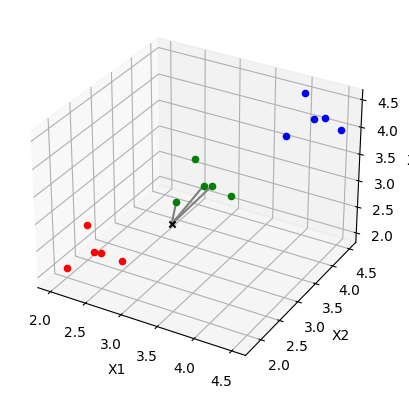

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Train dataset (features and labels)
X = np.array([
    [2, 2, 2], [2, 2.5, 2.5], [2.5, 2.5, 2], [2.5, 2, 2.5], [2.25, 2.25, 2.25],
    [3, 3, 3], [3, 3.5, 3.5], [3.5, 3.5, 3], [3.5, 3, 3.5], [3.25, 3.25, 3.25],
    [4, 4, 4], [4, 4.5, 4.5], [4.5, 4.5, 4], [4.5, 4, 4.5], [4.25, 4.25, 4.25],
])
y = [
    1, 1, 1, 1, 1,
    2, 2, 2, 2, 2,
    3, 3, 3, 3, 3,
]

x_unknown = np.array([3.6, 1.8, 3.6])
k = 3

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Distances from each training point to the new (unknown) point
D = [euclidean_distance(x, x_unknown) for x in X]
D_nearest = np.argsort(D)[:k]

# Get labels for k-nearest neighbors
knn_targets = [y[i] for i in D_nearest]

# Count occurrences of each label and store in a dictionary
target_counts = {label: knn_targets.count(label) for label in np.unique(knn_targets)}

# Find the target with the maximum occurrence
knn_class = max(target_counts, key=target_counts.get)

# Output prediction
print("Class prediction for", x_unknown, "=", knn_class)

# Plot the point and lines to the k neighbors in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Plot training data points with respective labels
colors = {1: 'r', 2: 'g', 3: 'b'}
for i, label in enumerate(y):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=colors[label])

# Plot unknown point
ax.scatter(x_unknown[0], x_unknown[1], x_unknown[2], marker='x', c='black')

# Plot lines between unknown point and its k-nearest neighbors
for i in D_nearest:
    ax.plot([x_unknown[0], X[i, 0]], [x_unknown[1], X[i, 1]], [x_unknown[2], X[i, 2]], color='gray')

plt.show()


### Multiple features

The algorithm `doesn't` work by running separate KNN calculations for each feature pair independently.  
Instead, it considers all features `simultaneously` for each data point.  

When you calculate KNN for a new data point with multiple features, the algorithm measures the `distance`  
between this new point and `all` other points in the dataset using all features.  

Lets `encapsulate` the algorithm into a class that classify items.  
The class `implements` a k-nearest neighbors algorithm for classification.  
The prediction is based on the `majority` class of its nearest neighbors in the training dataset.  

$ d(x,y,z) = \sqrt{(x2 - x1)^2 + (y2 - y1)^2 + ... + (w2 - w1)^2} $

$ d(X) = \sqrt{\sum_{i=1}^{n} (x2_i - x1_i)^2} $

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Train datasets
X = [
    [2, 2], [2, 2.5], [2.5, 2.5], [2.5, 2], [2.25, 2.25],
    [3, 3], [3, 3.5], [3.5, 3.5], [3.5, 3], [3.25, 3.25],
    [4, 4], [4, 4.5], [4.5, 4.5], [4.5, 4], [4.25, 4.25],
]
y = [
    1, 1, 1, 1, 1,
    2, 2, 2, 2, 2,
    3, 3, 3, 3, 3,
]

class KNeighborsClassifier:

    def __init__(self, n_neighbors):
        self.k = n_neighbors

    def fit(self, X_train, y_train):
        self.X = np.array(X_train)
        self.y = np.array(y_train)
    
    def predict(self, x_unknown):
        z = np.array(x_unknown)
        
        # Square distances
        SD = np.sqrt(np.sum((self.X - z)**2, axis=1))
        keys = np.argsort(SD)

        # Neighbors targets
        keys_knn = keys[:self.k]
        targets_knn = self.y[keys_knn]

        # Optim target
        most_common = np.bincount(targets_knn)
        result = most_common.argmax()
        
        return result

# Instantiate KNeighborsClassifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Unknown data point
x_unknown = [3.6, 1.8]  
knn_class = knn.predict(x_unknown)

# Output prediction
print("Prediction for", x_unknown, "= class", knn_class)


Prediction for [3.6, 1.8] = class 1
